In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


## Exploratory data analysis for books dataset

In [6]:
# To get the shape of books dataset
books.shape

(271360, 8)

In [7]:
# To get info about books dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
# To find the duplicates in books dataset
books.duplicated().sum()

0

In [9]:
duplicated_rows=books[books.duplicated()]
duplicated_rows

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


- No duplicated values in books dataset

In [10]:
# To find the null values in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
# To check in which rows does the null values are present
rows_with_null = books[books['Book-Author'].isnull()]
print(rows_with_null)

              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author Year-Of-Publication                       Publisher  \
118033         NaN                1999              Dorling Kindersley   
187689         NaN                1995  Edinburgh Financial Publishing   

                                              Image-URL-S  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-M  \
118033  http://images.amazon.com/images/P/0751352497.0...   
187689  http://images.amazon.com/images/P/9627982032.0...   

                                              Image-URL-L  
118033  http://images.amazon.com/images/P/0751352497.0...  
187689  http://images.amazon.com/images/P/9627982032.0...  


In [12]:
rows_with_null = books[books['Publisher'].isnull()]
print(rows_with_null)

              ISBN       Book-Title      Book-Author Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

       Publisher                                        Image-URL-S  \
128890       NaN  http://images.amazon.com/images/P/193169656X.0...   
129037       NaN  http://images.amazon.com/images/P/1931696993.0...   

                                              Image-URL-M  \
128890  http://images.amazon.com/images/P/193169656X.0...   
129037  http://images.amazon.com/images/P/1931696993.0...   

                                              Image-URL-L  
128890  http://images.amazon.com/images/P/193169656X.0...  
129037  http://images.amazon.com/images/P/1931696993.0...  


In [13]:
rows_with_null = books[books['Image-URL-L'].isnull()]
print(rows_with_null)

              ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
220731        2003           Gallimard   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Im

In [14]:
# To drop null values in books dataset
drop_nullvalues=books.dropna(inplace=True)
drop_nullvalues

In [15]:
# To again check for the null values in the dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [16]:
 # To change the datatype and also to sort and filter the year of publication by apply lambda functions
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
print(sorted(books['Year-Of-Publication'].dropna().unique()))
books['Year-Of-Publication'] = books['Year-Of-Publication'].apply(lambda x: np.nan if x < 1000 or x > 2025 else x)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [17]:
# To describe the dataset
books.describe()

,Year-Of-Publication
count,266723.000000
mean,1993.687863
std,8.321419
min,1376.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2024.000000


## Exploratory data analysis for users dataset

In [18]:
users.copy()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [19]:
# To find the shape of users dataset
users.shape

(278858, 3)

In [20]:
# To get the info about users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [21]:
# To find the duplicated values in users dataset
users.duplicated().sum()

0

In [22]:
duplicated_rows=users[users.duplicated()]
duplicated_rows

,User-ID,Location,Age


In [23]:
# To find the nullvalues in the users dataset
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [24]:
# To clean Age column
users['Age'] = users['Age'].apply(lambda x: np.nan if x < 5 or x > 100 else x)

In [25]:
# To describe the user dataset
users.describe()

,User-ID,Age
count,278858.00000,166848.000000
mean,139429.50000,34.746638
std,80499.51502,13.633051
min,1.00000,5.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,100.000000


In [26]:
## Top five locations in terms of frequency of repeatin
Top_five_locations=users['Location'].value_counts().sort_values(ascending=False).head(5)
Top_five_locations

Location
london, england, united kingdom       2506
toronto, ontario, canada              2250
sydney, new south wales, australia    1744
melbourne, victoria, australia        1708
portland, oregon, usa                 1629
Name: count, dtype: int64

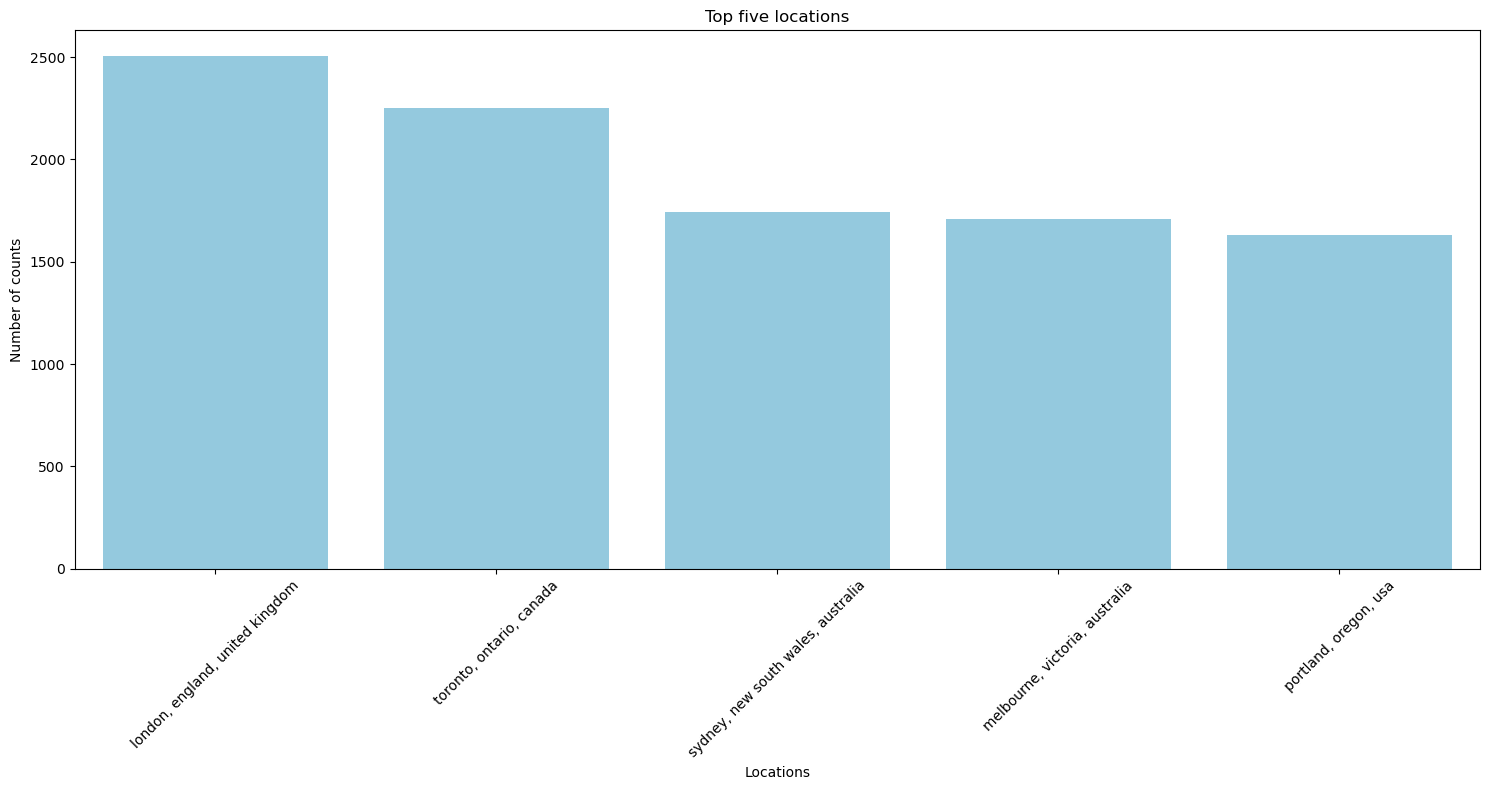

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(Top_five_locations,color='skyblue')
plt.title("Top five locations")
plt.xlabel("Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of counts")
plt.tight_layout()
plt.show()

## Exploratory data analysis for ratings dataset

In [28]:
ratings.copy()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [29]:
# To know the shape of ratings dataset
ratings.shape

(1149780, 3)

In [30]:
# To get info about ratings dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [31]:
# check for duplicated data in ratings
ratings.duplicated().sum()

0

In [32]:
# filter for explicit rating (1-10) only
explicit_ratings=ratings[(ratings['Book-Rating']>0)].copy()
explicit_ratings

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [33]:
# To filter users who are having atleast 20 or more rating
user_counts=explicit_ratings['User-ID'].value_counts()
active_users=user_counts[user_counts >= 50].index
explicit_ratings=explicit_ratings[explicit_ratings['User-ID'].isin(active_users)]
user_counts
active_users
explicit_ratings

,User-ID,ISBN,Book-Rating
1202,277203,030700645X,8
1203,277203,0307127923,8
1204,277203,0307302016,8
1205,277203,0307302636,8
1206,277203,0307987655,8
...,...,...,...
1149627,276680,1573222038,10
1149629,276680,1573229083,7
1149634,276680,1888173408,7
1149635,276680,1888173564,8


In [34]:
# To filter book which is having atleast 20 or more rating
book_counts=explicit_ratings['ISBN'].value_counts()
popular_books=book_counts[book_counts >=50].index
explicit_ratings = explicit_ratings[explicit_ratings['ISBN'].isin(popular_books)]

book_counts
popular_books
explicit_ratings

,User-ID,ISBN,Book-Rating
1584,277427,0385504209,8
3564,278137,0345337662,7
3647,278137,0804106304,8
10084,254,0142001740,9
10208,254,0439064864,9
...,...,...,...
1140446,274301,0440206154,10
1149493,276680,0316666343,7
1149516,276680,0375727345,8
1149530,276680,0385504209,8


In [35]:
# Merge cleaned datasets
ratings_books = pd.merge(explicit_ratings, books, on='ISBN', how='inner')
df = pd.merge(ratings_books, users, on='User-ID', how='inner')


# Export cleaned dataset
df.to_csv("Cleaned_BookData.csv", index=False)
df.shape
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,277427,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"gilbert, arizona, usa",48.0
1,278137,0345337662,7,Interview with the Vampire,Anne Rice,1993.0,Ballantine Books,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,"san antonio, texas, usa",27.0
2,278137,0804106304,8,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,"san antonio, texas, usa",27.0
3,254,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,"minneapolis, minnesota, usa",24.0
4,254,0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,"minneapolis, minnesota, usa",24.0


In [36]:
# To get the users who have given rating from 1 to 10(explicit_rating),active users and popular books in final dataset
print(f'Original ratings: {ratings.shape[0]}')
print(f'Explicit ratings kept: {explicit_ratings.shape[0]}')
print(f'Unique active users: {len(active_users)}')
print(f'Popular books retained: {len(popular_books)}')

Original ratings: 1149780
Explicit ratings kept: 2677
Unique active users: 1332
Popular books retained: 40


# Visualization

## Visual insights of the data

### distribution of age group

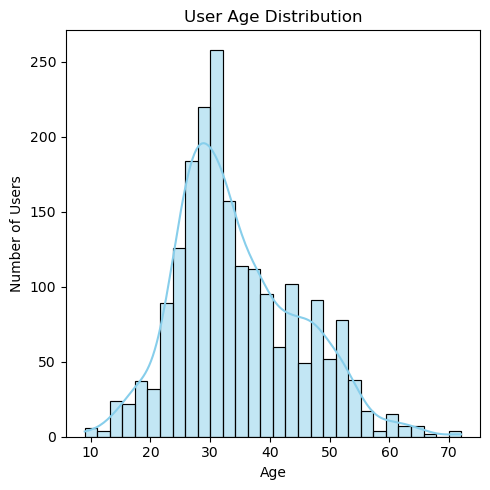

In [37]:
plt.figure(figsize=(5,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

### Book rating distribution

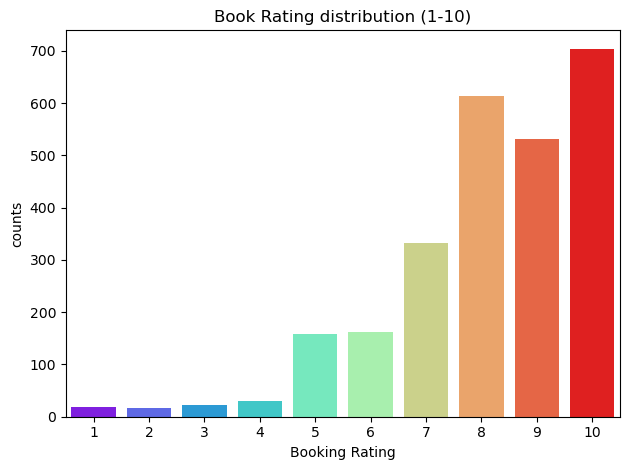

In [38]:
sns.countplot(x='Book-Rating',data=df,palette='rainbow',hue='Book-Rating',legend=False)
plt.title('Book Rating distribution (1-10)')
plt.xlabel('Booking Rating')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

### Top rated books

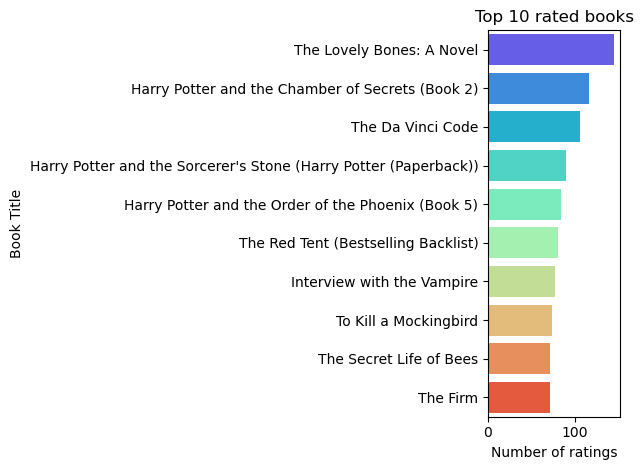

In [39]:
Top_books=df['Book-Title'].value_counts().head(10)
sns.barplot(x=Top_books.values,y=Top_books.index,hue=Top_books.index,palette='rainbow')
plt.title('Top 10 rated books')
plt.xlabel('Number of ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

### Most active users

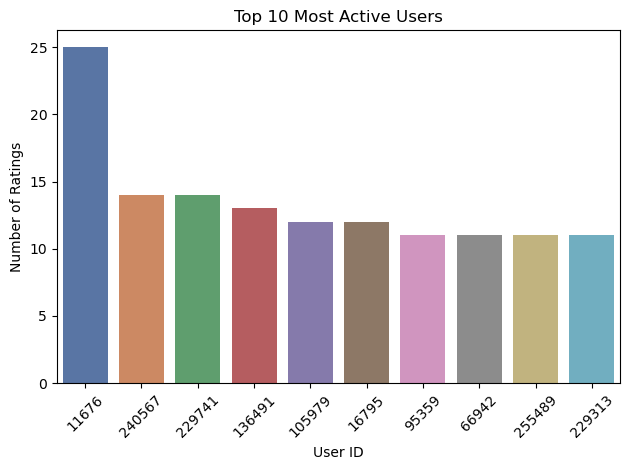

In [40]:
Top_users = df['User-ID'].value_counts().head(10)
sns.barplot(x=Top_users.index.astype(str), y=Top_users.values, hue=Top_users.index.astype(str), palette='deep', legend=False)
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Highest number of books published years(top 10)

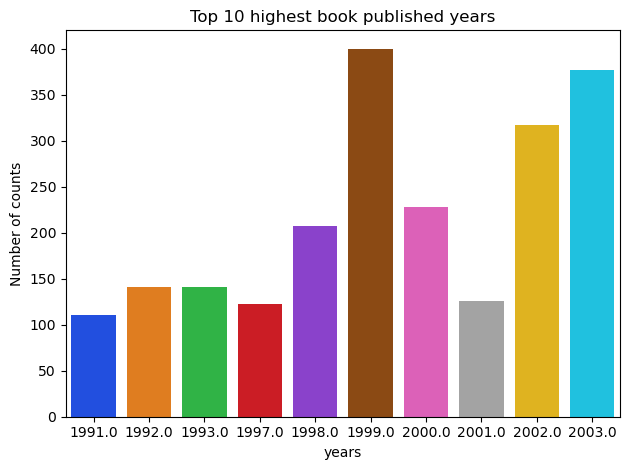

In [41]:
Top_bookpublished_years=df['Year-Of-Publication'].value_counts().head(10)
sns.barplot(x=Top_bookpublished_years.index,y=Top_bookpublished_years.values,hue=Top_bookpublished_years.index,palette='bright',legend=False)
plt.title('Top 10 highest book published years')
plt.xlabel('years')
plt.ylabel('Number of counts')
plt.tight_layout()
plt.show()

### popular book authors in market

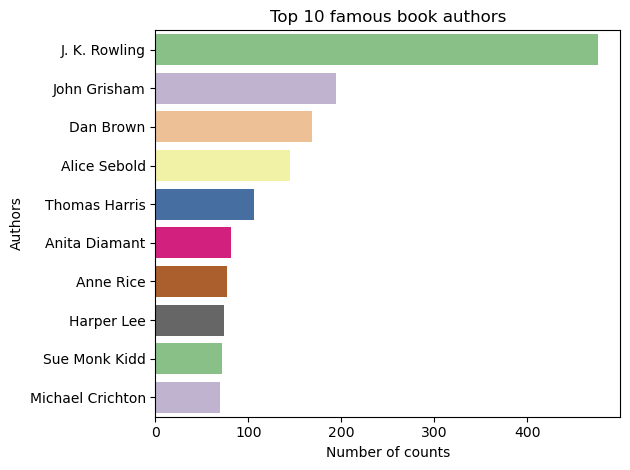

In [42]:
Top_book_authors=df['Book-Author'].value_counts().head(10)
sns.barplot(x=Top_book_authors.values,y=Top_book_authors.index,hue=Top_book_authors.index,palette="Accent",legend=False)
plt.title('Top 10 famous book authors')
plt.ylabel('Authors')
plt.xlabel('Number of counts')
plt.tight_layout()
plt.show()

### corelation and heatmap 

### corelation for numerical columns in final dataset

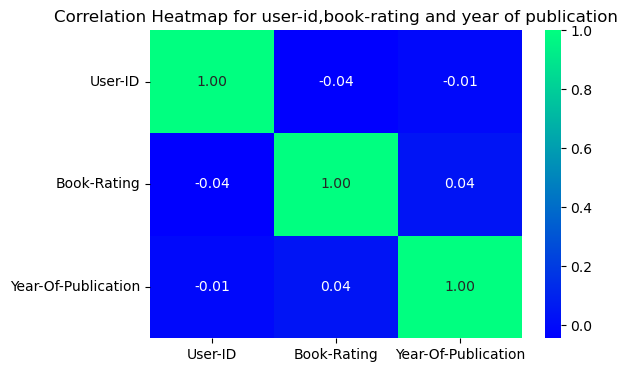

In [43]:
# Prepare numeric features from merged ratings and books
ratings_books = pd.merge(ratings, books, on='ISBN', how='inner')
ratings_books['Year-Of-Publication'] = pd.to_numeric(ratings_books['Year-Of-Publication'], errors='coerce')
corr_df = ratings_books[['User-ID','Book-Rating', 'Year-Of-Publication']].dropna()

# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap='winter', fmt=".2f")
plt.title("Correlation Heatmap for user-id,book-rating and year of publication")
plt.show()

## Model building

## popularity based filtering

In [44]:
# step1: To get number of ratings for each book
num_rating=df.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating.head(10)

,Book-Title,num_ratings
0,1st to Die: A Novel,55
1,A Time to Kill,69
2,Angels &amp; Demons,62
3,Bridget Jones's Diary,54
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,64
5,Girl with a Pearl Earring,64
6,Good in Bed,64
7,Harry Potter and the Chamber of Secrets (Book 2),117
8,Harry Potter and the Goblet of Fire (Book 4),64
9,Harry Potter and the Order of the Phoenix (Boo...,84


In [45]:
# step1: To get average ratings for each book
average_rating=df.groupby('Book-Title')['Book-Rating'].mean().reset_index()
average_rating.rename(columns={'Book-Rating':'average_ratings'},inplace=True)
average_rating.head(10)

,Book-Title,average_ratings
0,1st to Die: A Novel,8.109091
1,A Time to Kill,8.000000
2,Angels &amp; Demons,8.032258
3,Bridget Jones's Diary,7.703704
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,8.093750
5,Girl with a Pearl Earring,7.906250
6,Good in Bed,7.984375
7,Harry Potter and the Chamber of Secrets (Book 2),8.820513
8,Harry Potter and the Goblet of Fire (Book 4),9.203125
9,Harry Potter and the Order of the Phoenix (Boo...,8.916667


In [46]:
# step3: To merge the number of rating and average rating based on book title
merged_df = pd.merge(num_rating,average_rating, on='Book-Title')
merged_df

,Book-Title,num_ratings,average_ratings
0,1st to Die: A Novel,55,8.109091
1,A Time to Kill,69,8.000000
2,Angels &amp; Demons,62,8.032258
3,Bridget Jones's Diary,54,7.703704
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,64,8.093750
5,Girl with a Pearl Earring,64,7.906250
6,Good in Bed,64,7.984375
7,Harry Potter and the Chamber of Secrets (Book 2),117,8.820513
8,Harry Potter and the Goblet of Fire (Book 4),64,9.203125
9,Harry Potter and the Order of the Phoenix (Boo...,84,8.916667


In [47]:
# step 4: To get popular books which is having number of ratings greater than 250 and highest average ratings(top 10)
rating_number=60
popular_books=merged_df[merged_df['num_ratings']>rating_number].sort_values('average_ratings',ascending=False)
popular_books.head(10)

,Book-Title,num_ratings,average_ratings
8,Harry Potter and the Goblet of Fire (Book 4),64,9.203125
10,Harry Potter and the Prisoner of Azkaban (Book 3),64,9.125000
33,To Kill a Mockingbird,74,8.986486
12,Harry Potter and the Sorcerer's Stone (Harry P...,90,8.933333
9,Harry Potter and the Order of the Phoenix (Boo...,84,8.916667
7,Harry Potter and the Chamber of Secrets (Book 2),117,8.820513
31,The Secret Life of Bees,72,8.708333
22,The Da Vinci Code,106,8.575472
30,The Red Tent (Bestselling Backlist),81,8.506173
35,Where the Heart Is (Oprah's Book Club (Paperba...,69,8.405797


### collaborative filtering

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
df.shape

(2592, 12)

In [50]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,277427,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"gilbert, arizona, usa",48.0
1,278137,0345337662,7,Interview with the Vampire,Anne Rice,1993.0,Ballantine Books,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,http://images.amazon.com/images/P/0345337662.0...,"san antonio, texas, usa",27.0
2,278137,0804106304,8,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,http://images.amazon.com/images/P/0804106304.0...,"san antonio, texas, usa",27.0
3,254,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,"minneapolis, minnesota, usa",24.0
4,254,0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,"minneapolis, minnesota, usa",24.0


In [51]:
# step 1: Remove duplicate entries
# Drop duplicates just in case (same user rating the same book multiple times)
filtered_df = df.drop_duplicates(subset=['User-ID', 'Book-Title'])

In [52]:
filtered_df.shape

(2589, 12)

In [53]:
# Step 2: Create the user-item matrix
user_item_matrix = filtered_df.pivot(index='User-ID', columns='Book-Title', values='Book-Rating')
user_item_matrix.fillna(0, inplace=True)

#  Print the user-item matrix
print("User-Item Rating Matrix:")
user_item_matrix

User-Item Rating Matrix:


Book-Title,1st to Die: A Novel,A Time to Kill,Angels &amp; Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Girl with a Pearl Earring,Good in Bed,Harry Potter and the Chamber of Secrets (Book 2),Harry Potter and the Goblet of Fire (Book 4),Harry Potter and the Order of the Phoenix (Book 5),...,The Pelican Brief,The Pilot's Wife : A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,"The Vampire Lestat (Vampire Chronicles, Book II)",To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Where the Heart Is (Oprah's Book Club (Paperback)),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1025,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
user_item_matrix.shape

(880, 38)

In [55]:
#Step 3: Compute Similarity Between Users

# Compute similarity
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for readability
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_item_matrix.index, 
                                  columns=user_item_matrix.index)

# View sample
user_similarity_df.head()


User-ID,254,638,1025,1211,1424,1733,2033,2110,2766,2891,...,271705,272225,272715,273718,273979,274004,274301,276680,277427,278137
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.0,0.00000,0.0,0.00000,0.0,0.0,0.776396,0.0,0.000000,0.248264,...,0.225877,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.000000
638,0.0,1.00000,0.0,0.57735,0.0,0.0,0.000000,0.0,0.352738,0.000000,...,0.000000,0.504695,0.57735,0.57735,0.0,0.0,0.0,0.650945,0.57735,0.000000
1025,0.0,0.00000,1.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.475831,...,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.000000
1211,0.0,0.57735,0.0,1.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.874157,0.00000,0.00000,0.0,0.0,0.0,0.601317,1.00000,0.000000
1424,0.0,0.00000,0.0,0.00000,1.0,0.0,0.000000,0.0,0.000000,0.555136,...,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.752577


In [56]:
def recommend_books(user_id, user_item_matrix, user_similarity_df, top_n=10):
    if user_id not in user_item_matrix.index:
        return "User not found."
    
    # Find similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # drop self
    top_users = similar_users.head(5).index

    # Get their ratings
    similar_ratings = user_item_matrix.loc[top_users]

    # Average the ratings of similar users
    mean_ratings = similar_ratings.mean(axis=0)

    # Remove books already rated by this user
    books_rated_by_user = user_item_matrix.loc[user_id]
    books_rated = books_rated_by_user[books_rated_by_user > 0].index
    recommendations = mean_ratings.drop(index=books_rated)

    # Return top N recommended books
    return recommendations.sort_values(ascending=False).head(top_n)

In [57]:
recommend_books(user_id=638, 
                user_item_matrix=user_item_matrix, 
                user_similarity_df=user_similarity_df, 
                top_n=10)


Book-Title
To Kill a Mockingbird                  1.6
The Nanny Diaries: A Novel             1.6
1st to Die: A Novel                    0.0
The Pilot's Wife : A Novel             0.0
The Client                             0.0
The Firm                               0.0
The Five People You Meet in Heaven     0.0
The Joy Luck Club                      0.0
The Pelican Brief                      0.0
The Red Tent (Bestselling Backlist)    0.0
dtype: float64

In [59]:
# import or install pickle
import pickle

# Save the user-item matrix
pickle.dump(user_item_matrix, open('user_item_matrix.pkl', 'wb'))

# Save the user similarity matrix
pickle.dump(user_similarity_df, open('user_similarity.pkl', 'wb'))